In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
import pandas as pd
plt.style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns

In [ ]:
def SMA(data, period = 30, column='<CLOSE>'):
  return data[column].rolling(window=period).mean()
def SMA_fun(data, params):
  Profit = 0
  Loss = 0
  Q = params[0]
  S = params[1]
  data['SMA_Q'] = SMA(data, Q)
  data['SMA_S'] = SMA(data, S)
  data['Signal'] = np.where(data['SMA_Q'] > data['SMA_S'], 1, 0)
  data['Position'] = data['Signal'].diff()
  data['Buy'] = np.where(data['Position'] == 1, data['<CLOSE>'], -1)
  df_new = data[['<LOW>', '<HIGH>', 'Buy']]
  BuyList = df_new[data['Buy'] != -1]
  LIST = list(BuyList.index)
  for i in LIST:
    a = BuyList.loc[i]['Buy']
    TakeProfit = df_new['<HIGH>'] / a >= 1.01
    StopLoss = df_new['<LOW>'] / a <= 0.99
    df_new['Result'] = 2 * TakeProfit - 1 * StopLoss
    B1 = np.trim_zeros(df_new.loc[i:]['Result'])
    #print(B1)
    if len(B1) != 0:
      if B1[0] > 0:
        Profit += 1
      else:
        Loss += 1
  print(Profit - Loss, Q, S)
  return (Profit - Loss)

In [ ]:
FILE_NAME = 'YNDX_191001_191231.csv'

In [ ]:
df = pd.read_csv(FILE_NAME)
df = df.set_index(pd.DatetimeIndex(df['<DATE>'].values + ' ' + df['<TIME>'].values))

In [ ]:
A = []
for i in range(1, 151):
  for j in range(i+1, 151):
    A.append([i, j])
A = np.array(A)

In [ ]:
answer = np.array([np.nan]*22500).reshape((150, 150))

34 63 107
27 93 140
233 1 150
78 42 52
85 5 100
63 19 47
73 11 80
64 8 71
41 28 72
119 10 27
31 85 108
175 29 33
27 105 147
68 50 62
100 6 41
27 72 124
64 99 105
35 39 122
40 22 81
38 37 85
49 12 125
36 39 114
29 38 92
31 54 129
33 68 114
46 18 94
70 18 47
88 71 76
63 9 147
28 27 147
316 24 26
47 15 96
231 1 122
46 26 117
32 17 110
132 2 111
94 3 105
32 90 107
36 37 117
10 84 138
42 32 99
51 140 143
28 52 135
27 114 130
43 16 71
24 108 128
27 95 149
36 130 148
74 122 126
16 68 139
54 61 95
113 13 26
277 4 16
30 117 146
19 122 140
23 61 136
24 58 137
20 60 141
30 72 127
59 31 50
52 19 48
22 46 142
21 115 131
50 61 91
17 75 147
29 55 130
52 20 74
69 106 112
42 28 123
103 12 30
49 15 91
46 9 127
34 37 138
26 101 116
39 59 116
83 44 52
72 7 51
120 5 44
22 64 138
41 68 117
52 101 108
59 33 52
32 105 130
81 74 79
30 46 138
37 9 118
83 27 40
59 32 52
250 17 20
52 23 68
35 12 108
28 87 128
56 7 108
41 38 103
29 49 119
166 22 28
31 49 114
36 67 112
23 45 143
35 40 73
49 46 64
49 37 73
37 55 96


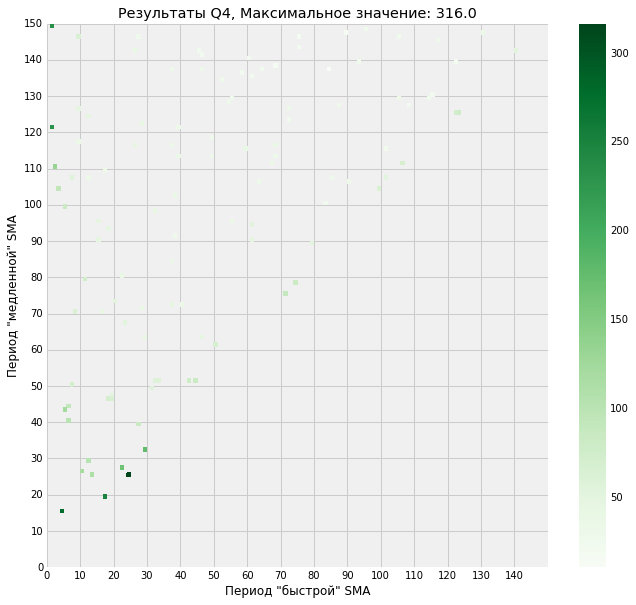

52 28 50
440 2 10
240 1 83
83 81 86
65 49 59
40 56 90
90 22 37
83 5 90
164 39 43
301 4 11
51 11 91
174 2 67
40 48 92
44 57 80
55 18 59
129 6 34
42 65 79
79 46 57
81 11 36
41 39 86
42 35 90
85 11 30
45 61 85
51 44 73
38 50 91
53 29 57
77 12 42
50 42 81
97 18 33
47 41 78
47 54 77
41 21 89
42 37 89
79 5 81
108 7 40
51 12 53
77 7 57
92 19 37
75 83 91
43 34 55
54 19 49
50 43 78
37 38 74
37 33 83
52 20 59
180 12 19
202 2 38
73 39 51
63 4 56
67 21 42
49 64 87
110 21 32
73 13 47
36 36 88
48 17 81
125 67 71
48 26 74
43 61 89
356 15 17
277 78 79
239 12 16
428 1 24
49 20 57
61 13 50
48 58 84
84 34 45
235 4 20
44 32 64
69 19 44
153 17 25
45 78 92
91 8 47
67 38 53
173 60 62
94 69 74
39 56 87
41 49 75
242 88 89
46 16 59
89 52 59
159 10 19
42 38 89
66 73 81


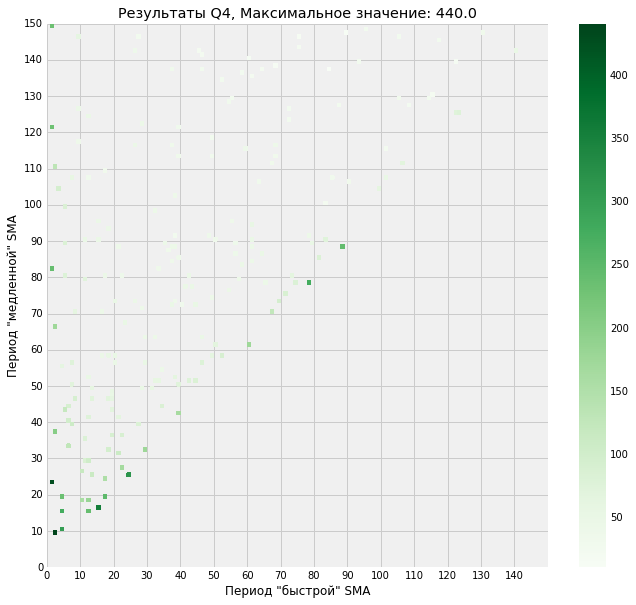

133 10 24
65 36 52
287 14 17
56 18 52
120 19 29
129 41 46
205 8 17
279 1 48
42 24 54
280 5 12
89 5 49
239 42 44
61 14 50
166 2 52
60 22 54
365 1 31
54 32 51
282 3 14
125 4 46
52 19 48
246 33 35
243 2 27
67 23 45
90 5 53
93 9 32
66 22 47
122 35 40
110 7 41
103 17 35
482 2 9
61 13 50
359 1 32
461 7 9
67 33 49
73 23 40
344 14 16
76 21 40
118 5 37
98 38 45
55 14 52
103 29 39
68 11 43
185 9 18
152 6 28
77 5 54
194 10 18
176 20 26
98 29 41
179 19 25
98 7 34
111 17 30
309 6 11
146 6 25
178 2 50
67 19 39
539 27 28


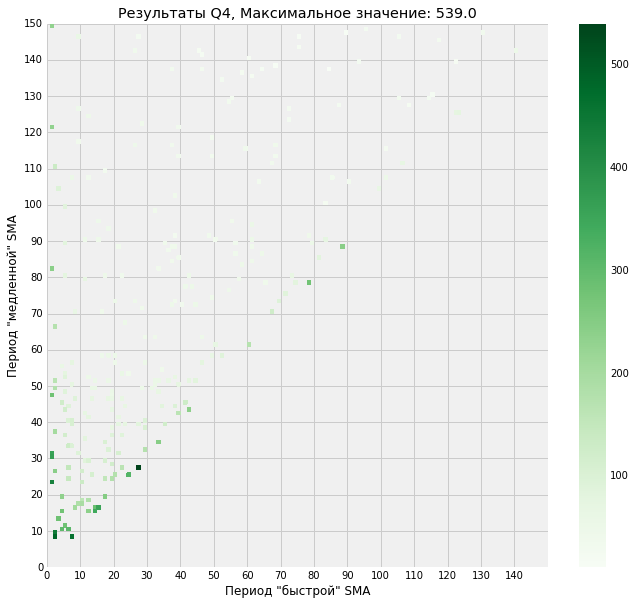

83 9 39
137 22 29
455 30 31
66 19 41
153 3 44
135 3 52
57 17 50
73 6 54
449 1 19
63 33 51
132 34 40
63 18 45
321 11 14
109 15 26
79 9 40
93 7 38
49 23 51
173 23 28
373 1 33
89 35 45
64 38 54
208 34 37
243 2 27
137 24 32
121 5 35
102 25 36
152 27 32
131 5 34
80 12 48
261 16 19
514 2 8
442 1 20
129 8 28
220 4 22
53 27 50
92 6 45
95 28 37
164 39 43
75 38 49
96 8 45
67 8 54
350 13 15
77 12 38
266 4 14
83 34 47
53 15 54
66 18 44
151 2 54
175 4 31
81 11 45
199 12 18
71 11 38
422 33 34
176 20 26
78 7 53
53 34 54
163 33 37
48 24 50
124 4 40
77 34 46
144 18 26
582 2 6
56 29 54
129 30 36
71 32 44
47 19 51
62 37 52
77 12 42
91 28 38
110 42 49
90 9 36
327 23 25
54 24 52
811 6 7
289 5 11
126 10 26
185 3 30
149 25 31
50 18 50
86 11 46
191 5 23
47 27 54
226 4 23
232 38 40
97 13 34
105 17 33
67 30 51
68 21 45
109 21 31
109 7 42
148 3 49
301 4 11
164 15 23
71 14 40
99 8 46
238 15 19
73 8 50
211 44 46
122 35 40
66 16 43
86 42 50
94 10 45
306 10 13
131 5 36
205 4 24
117 45 51
74 15 46
106 4 52
175 3 45
1

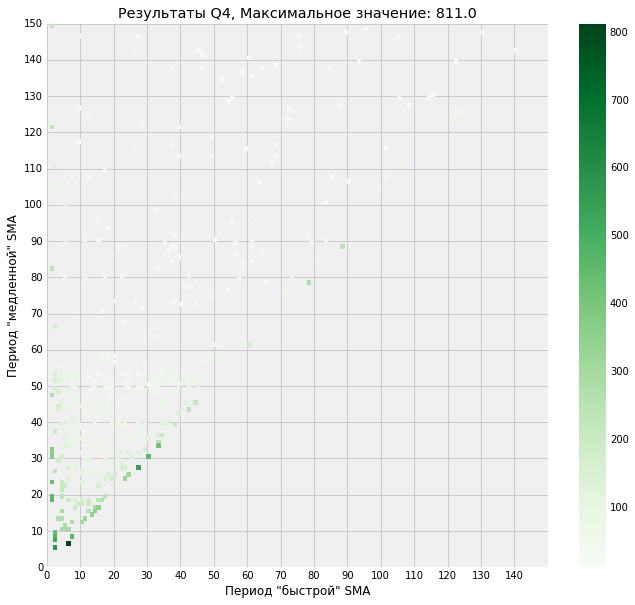

136 9 24
252 3 20
162 9 23
137 11 21
220 18 22
249 22 25
366 4 9
637 13 14
354 21 23
275 3 18
240 10 16
166 7 22
739 7 8
161 11 19
164 12 22
321 11 14
461 7 9
194 12 17
202 3 26
151 10 22
301 4 11
225 4 21
150 16 24
164 15 23
149 5 25
235 4 20
109 12 26
220 5 18
162 9 19
188 11 18
208 16 21
665 3 5
194 10 18
141 7 26
191 5 23
145 12 23
159 10 19
464 1 17
176 13 20
280 5 12
392 1 25
367 8 11
486 6 8
250 17 20
514 2 8
252 4 18
153 10 23
322 2 20
254 23 26
113 13 26
502 1 14
428 1 24
450 10 12
185 7 20


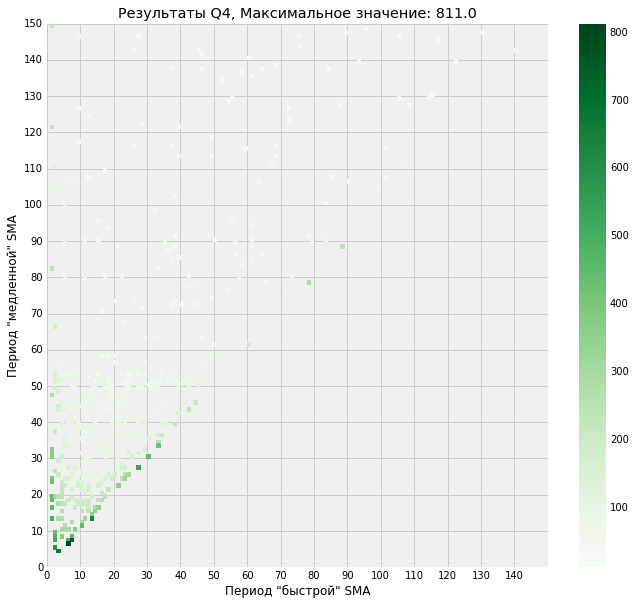

In [ ]:
for t in range(1, 6):
  if t > 1:
    y = 150 - np.nanargmax(answer.reshape(1, -1)) // 150
    x = np.nanargmax(answer.reshape(1, -1)) % 150
    A = A[A[:,0] >= x - (150 // (1.5**t))]
    A = A[A[:,0] <= x + (150 // (1.5**t))]
    A = A[A[:,1] >= y - (150 // (1.5**t))]
    A = A[A[:,1] <= y + (150 // (1.5**t))]
  L = random.sample(list(A), len(A) // (100 // 2**(t-1)))
  Step_X = np.array(L)[:, 0]
  Step_Y = np.array(L)[:, 1]
  for i in range(len(L)):
      answer[150 - Step_Y[i]][Step_X[i]] = SMA_fun(df, [Step_X[i], Step_Y[i]])
  plt.figure(figsize=(10, 10))
  ax = sns.heatmap(answer, cmap = 'Greens')
  ax.set_title('Результаты Q4, Максимальное значение: ' + str(np.nanmax(answer)))
  ax.set_ylabel('Период "медленной" SMA')
  ax.set_xlabel('Период "быстрой" SMA')
  ax.set_xticks(np.arange(0, 151, 10))
  ax.set_xticklabels(range(0, 150, 10), rotation = 0)
  ax.set_yticks(np.arange(0, 151, 10))
  ax.set_yticklabels(range(150, -1, -10), rotation = 0)
  ax.grid()
  plt.show()

In [ ]:
np.nanmax(answer)

128.0

In [ ]:
SMA_fun(df, [50, 110])

-38 50 110


-38